# Import software libraries

In [175]:
import sys                            
import os                             
import numpy as np                   
import pandas as pd                    
import matplotlib                     
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     
import sklearn                       
import seaborn as sb                  


print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.16.2
- Pandas 0.24.2
- Matplotlib 3.0.3
- SciPy 1.2.1
- Scikit-learn 0.20.3
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]



# Load the dataset

In [176]:
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, './seoul_bike_data')
print("Data files in this project: ", os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, "seoul_bike_data.csv")
data_file = pd.read_csv(data_raw_file)
print("Loaded {} records from {}.\n".format(len(data_file), data_raw_file))

Data files in this project:  ['seoul_bike_data.csv']
Loaded 8394 records from ././seoul_bike_data/seoul_bike_data.csv.



# Get acquainted with the dataset

In [177]:
print(data_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
bikes_rented    8394 non-null int64
temp            8394 non-null float64
humidity        8394 non-null int64
wind_speed      8394 non-null float64
visibility      8394 non-null int64
dew_temp        8394 non-null float64
solar_rad       8394 non-null float64
rainfall        8394 non-null float64
snowfall        8394 non-null float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB
None


# Show example records

In [178]:
print(data_file.head(10))

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  

# Examine a general summary of statistics

In [179]:
with pd.option_context('float_format' , '{:.2f}'.format):
    print(data_file.describe())

       bikes_rented    temp  humidity  wind_speed  visibility  dew_temp  \
count       8394.00 8394.00   8394.00     8394.00     8394.00   8394.00   
mean         731.37   12.81     58.07        1.74     1433.23      3.96   
std          643.62   12.11     20.48        1.03      609.80     13.24   
min            2.00  -17.80      0.00        0.10       27.00    -30.60   
25%          214.00    3.10     42.00        1.00      932.25     -5.10   
50%          546.00   13.60     57.00        1.50     1690.00      4.80   
75%         1088.00   22.70     74.00        2.30     2000.00     15.20   
max         3556.00   39.40     98.00        7.40     2000.00     27.20   

       solar_rad  rainfall  snowfall  
count    8394.00   8394.00   8394.00  
mean        0.57      0.15      0.08  
std         0.87      1.13      0.45  
min         0.00      0.00      0.00  
25%         0.00      0.00      0.00  
50%         0.01      0.00      0.00  
75%         0.94      0.00      0.00  
max         

# Look for columns that correlate with `bikes_rented`

In [180]:
print("Correlation with")
corr_matrix=data_file.corr()
corr_matrix["bikes_rented"].sort_values(ascending=False)

Correlation with


bikes_rented    1.000000
temp            0.563440
dew_temp        0.401160
solar_rad       0.272748
visibility      0.213989
wind_speed      0.120961
rainfall       -0.128794
snowfall       -0.151881
humidity       -0.201466
Name: bikes_rented, dtype: float64

# Visually analyze cross correlations

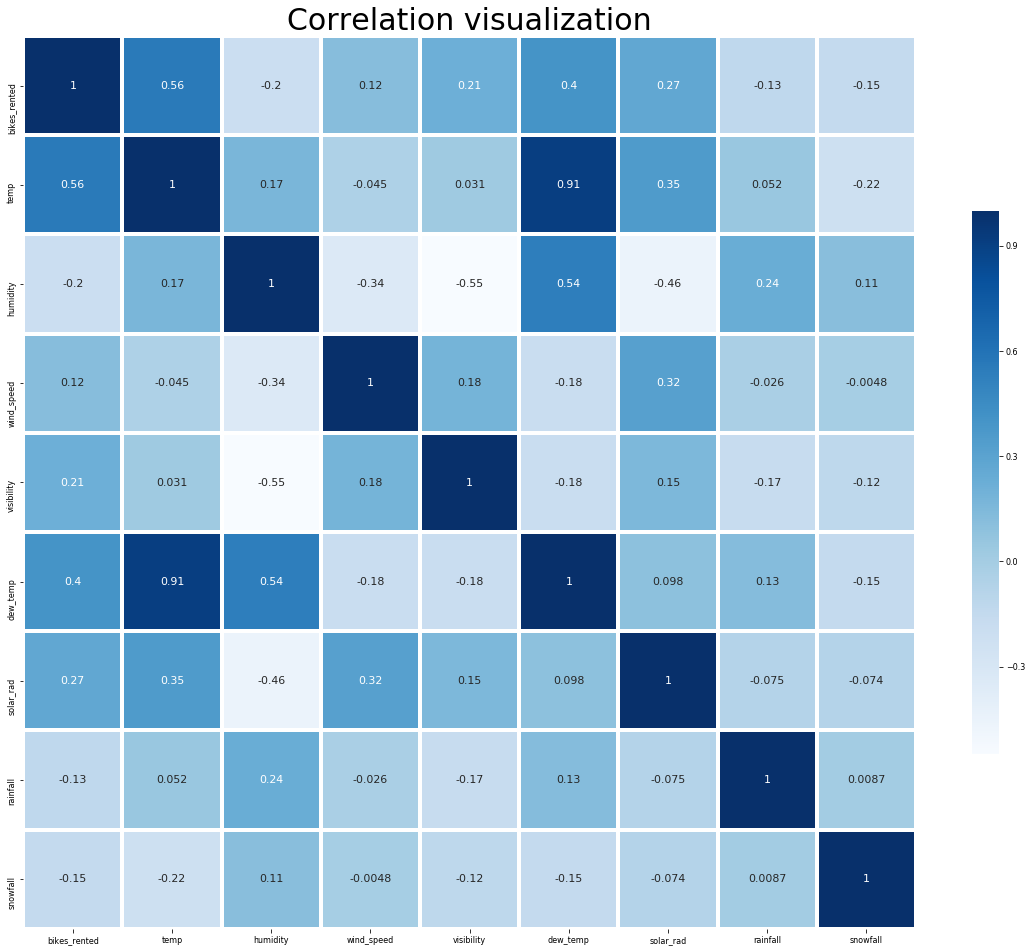

In [181]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
f, axes = plt.subplots (figsize=(20,20))
plt.title("Correlation visualization", fontsize = 30)
features=["bikes_rented", "temp", "humidity", "wind_speed", "visibility", "dew_temp", "solar_rad", "rainfall", "snowfall"]
sb.heatmap(data_file[features].corr(), linewidths=3.0, square=True,cmap="Blues", linecolor="w", annot=True, annot_kws={'size':11},cbar_kws={'shrink': .5})
plt.show()

# Use histograms to visualize the distribution of all features

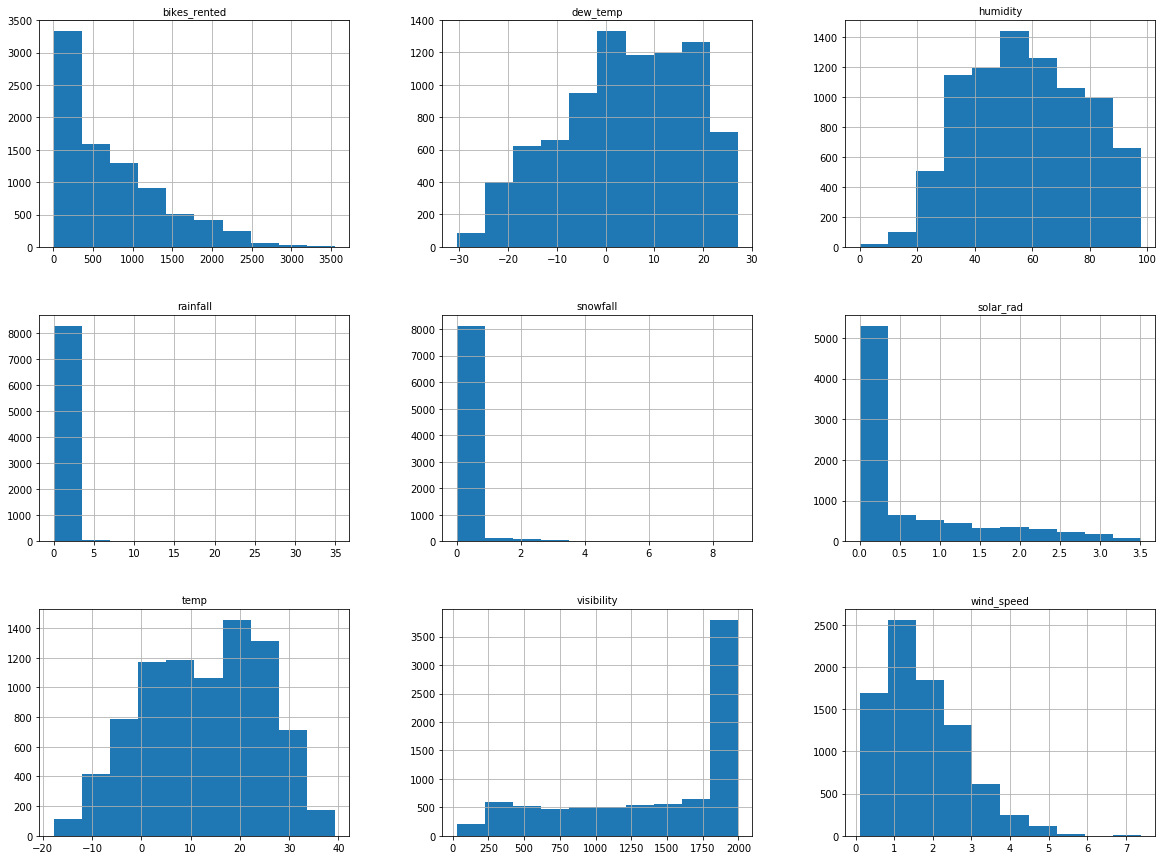

<Figure size 432x288 with 0 Axes>

In [182]:
mpl.rc('axes', labelsize=12)
mpl.rc('ytick', labelsize=10)
mpl.rc('xtick', labelsize=10)
data_file.hist(figsize=(20,15))
plt.figure()
plt.show()

# Split the data into training and testing sets and labels

In [183]:
import sklearn
from sklearn.model_selection import train_test_split
label_columns= ["bikes_rented"]
training_columns=["temp", "humidity", "wind_speed", "visibility", "dew_temp", "solar_rad", "rainfall", "snowfall"]
data_train, data_test, data_train_labels, data_test_labels = train_test_split(data_file[training_columns], data_file[label_columns], random_state=42)

print(f'Original Set: {data_file.shape}')
print('--------------------------------')
print(f'Training Features: {data_train.shape}')
print(f'Testing Features:  {data_test.shape}')
print(f'Training Labels:   {data_train_labels.shape}')
print(f'Testing Labels:    {data_test_labels.shape}')

Original Set: (8394, 9)
--------------------------------
Training Features: (6295, 8)
Testing Features:  (2099, 8)
Training Labels:   (6295, 1)
Testing Labels:    (2099, 1)


# Build and test an initial linear regression model

In [184]:
from sklearn.linear_model  import LinearRegression
from time import time
regressor = LinearRegression()
start = time()
regressor.fit(data_train, data_train_labels)
end=time()
train_time=(end-start) * 1000
print("Model took {:,.2f} milliseconds to fit.".format(train_time))

Model took 4.26 milliseconds to fit.


# Use the holdout dataset to test the model

In [185]:
score=regressor.score (data_test, data_test_labels)
print("Score:{}%".format(int(round(score*100))))

Score:44%


# Compare the first ten predictions to actual values

In [186]:
predicted_bikes_rented=regressor.predict(data_test)
predictions=data_test_labels.copy()
predictions["Predicted"]=predicted_bikes_rented
with pd.option_context("float_format", "{:,.2f}".format):print(predictions.head(10))

      bikes_rented  Predicted
33             328      80.39
3898          1058   1,157.49
766            273     517.14
8071          1037     815.20
4746          2378   1,076.47
5422           695     839.23
1426           170     121.40
1328           322     -60.25
1076           321     443.22
5209           670     837.60


# Identify outliers

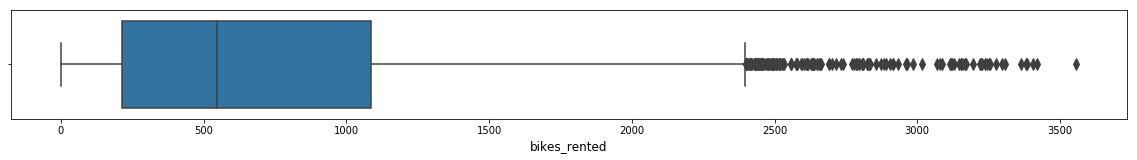

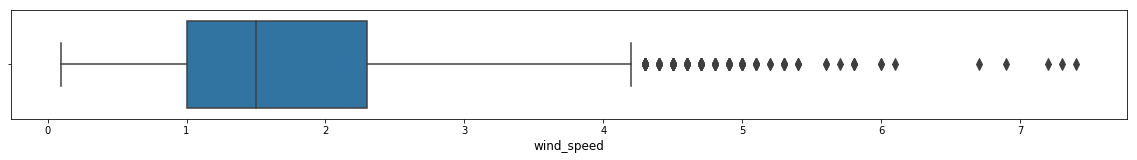

In [187]:
# Use Matplotlib to create box plot distributions for bikes rented and wind speed.
feature_list=["bikes_rented","wind_speed"]
for feature in feature_list:
    plt.figure(figsize=(20,2))
    bplot = sb.boxplot(x=feature, data=data_file,orient="h", fliersize=8)

# Examine data values in the outliers

In [188]:
data_train.loc[data_train_labels["bikes_rented"]>3500]

,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
4743,24.1,57,2.9,1301,15.0,0.56,0.0,0.0


In [189]:
data_train.loc[data_train["wind_speed"]>6]

,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
909,0.7,77,6.7,692,-2.8,0.0,0.9,1.0
3112,19.7,52,7.2,2000,9.5,0.2,0.0,0.0
3115,17.5,70,7.3,1634,11.9,0.0,0.5,0.0
6230,25.3,70,6.9,925,19.4,0.0,0.4,0.0
3108,21.2,35,7.4,1992,5.1,1.8,0.0,0.0


# Drop outliers from the training dataset

In [190]:
print(f"{len(data_train):6d} bikes rented in the training dataset")
data_train=data_train.loc[data_train_labels["bikes_rented"]<3500]
data_train_labels=data_train_labels.loc[data_train_labels["bikes_rented"]<=3500]
print(f"{len(data_train):6d} bikes rented remain after removing outliers above 3500 pcs")

data_train_labels=data_train_labels.loc[data_train["wind_speed"]<=6]
data_train=data_train.loc[data_train["wind_speed"]<=6]
print(f"{len(data_train):6d} bikes rented remains after removing outliers in wind data above 6")





  6295 bikes rented in the training dataset
  6294 bikes rented remain after removing outliers above 3500 pcs
  6289 bikes rented remains after removing outliers in wind data above 6


# Compare the scale and distribution of `bikes_rented` and `wind_speed`

In [191]:
with pd.option_context("float_format","{:,.2f}".format):
    print(data_train["wind_speed"].describe(),"\n")
    print(data_train_labels["bikes_rented"].describe())

count   6,289.00
mean        1.73
std         1.01
min         0.10
25%         1.00
50%         1.50
75%         2.30
max         6.00
Name: wind_speed, dtype: float64 

count   6,289.00
mean      731.78
std       643.30
min         2.00
25%       214.00
50%       546.00
75%     1,091.00
max     3,418.00
Name: bikes_rented, dtype: float64


# Transform `bikes_rented` and `wind_speed`, and compare results

Maximum bikes rented = 3418
Maximum wind speed = 6.0
Maximum bikes rented = 8.136810863675537
Maximum wind speed = 1.791759469228055


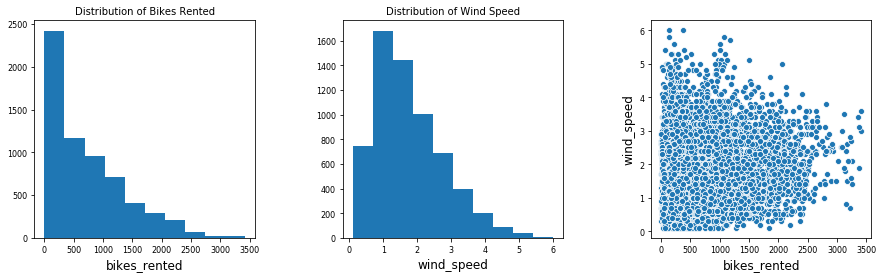

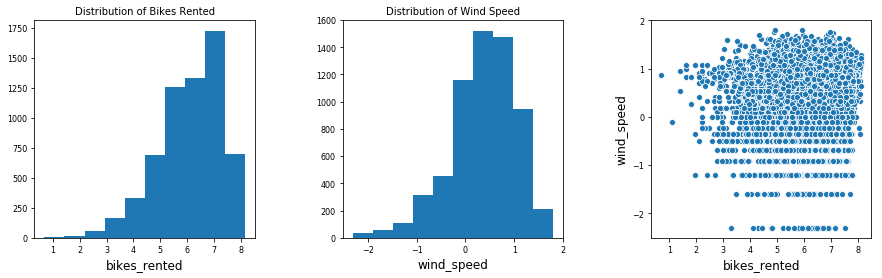

In [192]:
def compare_bikes_rented_wind_speed():
    print("Maximum bikes rented =", data_train_labels.loc[data_train_labels["bikes_rented"].idxmax()]["bikes_rented"])  
    print("Maximum wind speed =", data_train.loc[data_train["wind_speed"].idxmax()]["wind_speed"])

    figure = plt.figure(figsize=(15, 4))
    figure.subplots_adjust(wspace=.4)
    plt.rc("axes", titlesize=10)
    plt.rc("axes", labelsize=12)
    plt.rc("xtick", labelsize=8)
    plt.rc("ytick", labelsize=8)

    ax1 = figure.add_subplot(1, 3, 1)
    plt.xlabel("bikes_rented")
    plt.hist(data_train_labels["bikes_rented"], label="Bikes Rented")
    ax1.set_title("Distribution of Bikes Rented")

    ax2 = figure.add_subplot(1, 3, 2)
    plt.xlabel("wind_speed")
    plt.hist(data_train["wind_speed"], label="Wind Speed")
    ax2.set_title("Distribution of Wind Speed")

    ax2=figure.add_subplot(1,3,3)
    sb.scatterplot(x=data_train_labels["bikes_rented"],y=data_train["wind_speed"])

compare_bikes_rented_wind_speed()

data_train["wind_speed"] = np.log(data_train["wind_speed"])
data_train_labels["bikes_rented"] = np.log(data_train_labels["bikes_rented"])
data_test["wind_speed"] = np.log(data_test["wind_speed"])
data_test_labels["bikes_rented"] = np.log(data_test_labels["bikes_rented"])

compare_bikes_rented_wind_speed()

# Build and test a new linear regression model

In [193]:
import sklearn  
from sklearn.linear_model import LinearRegression

from time import time
regressor=LinearRegression()
start=time()
regressor.fit(data_train,data_train_labels)
end=time()
train_time=(end-start) * 1000
print("Model took {:,.2f} milliseconds to fit.".format(train_time))
score=regressor.score(data_test, data_test_labels)
print("Score: {}%".format(int(round(score * 100))))

Model took 3.20 milliseconds to fit.
Score: 53%


# Compare the first ten predictions to actual values for the new model

In [194]:
predicted_bikes=regressor.predict(data_test)
predictions=data_test_labels.copy()
predictions["predicted"]=predicted_bikes

with pd.option_context("float_format", "{:,.2f}".format): print(predictions.head(10))

      bikes_rented  predicted
33            5.79       4.99
3898          6.96       7.16
766           5.61       5.70
8071          6.94       6.43
4746          7.77       6.63
5422          6.54       6.13
1426          5.14       5.19
1328          5.77       4.72
1076          5.77       5.62
5209          6.51       6.28


# Convert the bike rentals back to their initial scale

In [195]:
import math
predictions=predictions.applymap(math.exp)
with pd.option_context("float_format", "{:,.2f}".format): print(predictions.head(10))

      bikes_rented  predicted
33          328.00     147.57
3898      1,058.00   1,293.24
766         273.00     298.08
8071      1,037.00     617.74
4746      2,378.00     757.99
5422        695.00     459.41
1426        170.00     179.43
1328        322.00     112.54
1076        321.00     276.72
5209        670.00     534.71
